In [16]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "import functions")

# 1. Introduction to inference: A radioactive decay inference problem

In this section we will study a simple inference problem where we have to estimate the radioactive decay constant from decay events [(MacKay, 2003)](http://www.inference.org.uk/itprnn/book.pdf). This example will introduce several of the foundational ideas behind probabilistic inference.

## Example: Estimating a radioactivity decay constant

Unstable particles are emitted from a source and decay after travelling a distance $x$. The apparatus used to measure the decays can only detect them within the range $(x_{min}, x_{max})$ of the particle source. Physics tells us that $x$ follows an exponential distribution with a decay constant $\lambda$:

$$\begin{align}
p(x|\lambda) = \frac{1}{Z(\lambda)} \text{exp}\bigg(-\frac{x}{\lambda}\bigg)
\end{align}$$

where $Z(\lambda)$ is a normalisation coefficient of \\( p(x|\lambda) \\). After taking a number of measurements within the window \\((x_{min}, x_{max}) = (5, 50)\\) we end up with the dataset shown below

<div class="row">
  <div class="column">
    <img src="radio_numberline-mod.svg" alt="Snow" style="width:80%; float: center; padding: 0px; padding : 20px">
  </div>
</div>

**How can we infer the value of $\boldsymbol{\lambda}$ from these measurements**? 

We're going to begin by considering two <a href="https://en.wikipedia.org/wiki/Heuristic_(computer_science)">**heuristic**</a> approaches to this inference problem in order to understand what properties an "ideal" approach might have. When I ask people to suggest heuristic approaches they usually fall into two categories: those which involve computing a histogram of the data and those based around computing a statistic of the data such as the mean. This [notebook](radioactive_heuristic_methods.ipynb) works through the two most popular brands of approaches showing that they are _ad hoc_ and have several pitfalls. For example, in the histogram approach, where should the bins be placed? Or in the statistic approach, which statistic should be used? What is needed is a principled approach to inference.

### A Probabilistic Approach to Inference in the Radioactive Decay Example

We now consider an inference method that has fewer _ad hoc_ choices. Probabilistic inference is based on two key ideas:

1. the "right" answer to the inference problem is a probability distribution over all possible settings of the unknown variables that indicates the plausiblity of each setting given obeserved data.

2. to compute the answer to an inference problem, apply the sum and product rules of probability to evaluate the plausibility of any setting of any unknown variable given observed data

\begin{align}
\text{Sum rule:} \;\;\;\;\;\;\;\;\;\;\;\; p(A) &= \int p(A,B) \text{d}B\\
%
\text{Product rule: } \;\;\;\;\;\;\;\; p(A,B) & = p(B) p(A|B) = p(A) p(B|A)
\end{align}

**Bayes' rule** is a consequence of the product rule derived simply by dividing through by $p(B)$:

\begin{align}
\text{Bayes' rule:} \;\;\;\;\;\;\;\;\;\;\;\; p(A|B) & = \frac{p(A) p(B|A)}{p(B)}
\end{align}

Bayes' rule is especially useful when performing inference as the left hand side is the plausiblity of A (an unknown variable of interest) given B (observed data). The right hand side multiplies our prior knowledge about $A$ (expressed as a distribution $p(A)$) with the probabilistic relationship between $A$ and $B$ ($p(B|A)$ which corresponds to our modelling assumptions). The normalising constant, $p(B)$, ensures that the right hand side integrates to $1$ and is sometimes dropped:

\begin{align}
\text{Bayes' rule:} \;\;\;\;\;\;\;\;\;\;\;\; \color{magenta}{p(A|B)} & \propto \color{blue}{p(A)} \color{red}{p(B|A)}
\end{align}

The distributions in this equation have special names and can be interpretted as follows: <br><br> 


<center>
<span style="color:magenta">**posterior distribution**</span> $\propto$ <span style="color:blue">**prior distribution**</span> $\times$ <span style="color:red">**likelihood of the parameters**</span>
 </center>  

<center>
<span style="color:magenta">
what we know after seeing the data </span>$\propto$ <span style="color:blue">what we knew before seeing the data </span>$\times$ <span style="color:red">what the data told us</span>




<div class="further_box">

**Further Reading: Theoretical foundations of probablistic inference**

The probabilisitc approach has several elegant theoretical properties. [Cox (1946)](https://bayes.wustl.edu/etj/prob/book.pdf) showed that probabilistic inference was the only calculus that obeyed basic desireable axioms. Chief among them is consistency: that if the plausibility in an unknown quantity can be computed in different ways, that each should give the same answer. [Ramsey (1926)](https://plato.stanford.edu/entries/dutch-book/#BasiDutcBookArguForProb) showed that if you do not reason using probabilistic inference, there are set of bets called Dutch books which you would accept, but which are guaranteed to lose you money.

</div>

**Application to the radioactive decay example**

Let's unpack these two ideas in the context of the radioactive decay example. 

1. We argued earlier that we could not be precisely sure of the underlying setting of the decay constant $\lambda$ given the observed data. Probabilistic inference acknowledges this fact and says that we should not return a single estimate of $\lambda$, but rather a distribution $p(\lambda | \{ x_n \}_{n=1}^N)$ that indicates the plausibility of any setting of $\lambda$ given the observed data $\{ x_n \}_{n=1}^N$.

2. In order to compute the distribution $p(\lambda | \mathcal{D})$ we can apply Bayes' rule with $A = \lambda$ and $B = \{x_{1} ... x_{N}\} = \{ x_n \}_{n=1}^N$. 

\begin{align}
p(\lambda | \{ x_n \}_{n=1}^N) = \frac{1}{p(\{ x_n \}_{n=1}^N )} p(\lambda) p(\{ x_n \}_{n=1}^N | \lambda )
\end{align}

As the decay events are independent given $\lambda$ this simplifies:

\begin{align}
p(\lambda | \{ x_n \}_{n=1}^N) = \frac{ 1}{p(\{ x_n \}_{n=1}^N )} p(\lambda) \prod_{n=1}^N p(\{ x_n \}_{n=1}^N | \lambda ) \propto p(\lambda) \prod_{n=1}^N p( x_n | \lambda )
\end{align}

Where in the last step we have dropped the normalising constant $p(\{ x_n \}_{n=1}^N )$.

In this way, Bayes' rule relates the posterior distribution over the decay constant to our model of the observed data $p(\{ x_n \}_{n=1}^N | \lambda )$. Bayes' rule also requires we specify our prior knowledge about the decay constant, $p(\lambda)$, which we will discuss below. Before we do this, notice that together the prior $p(\lambda)$ and the probability of the observed data given the decay constant $p( x_n | \lambda )$ specify a complete probabilistic recipe for generating datasets (by first sampling $\lambda$ and then sampling $N$ observed data from $p(\{ x_n \}_{n=1}^N | \lambda )$). This is sometimes called a **forward model** as it moves from the unknown variables to the observed variables. Inference is sometimes called **inverse modelling** as it moves from the observed variables to the unknown variables. 

**Sufficient Statistics**

Now let's substitute in the expression for the model $p( x_n | \lambda ) = \frac{1}{Z(\lambda)} \exp\left(- x_n/\lambda \right)$ into Bayes' rule

\begin{align}
p(\lambda | \{ x_n \}_{n=1}^N) \propto p(\lambda) \prod_{n=1}^N \left( \frac{1}{Z(\lambda)} \exp\left(- x_n/\lambda \right)\right) = p(\lambda)  \frac{1}{Z(\lambda)^N} \exp\left(-\frac{1}{\lambda} \sum_{n = 1}^{N} x_n \right)
\end{align}

Notice then that we do not need to store all of the individual datapoints $\{ x_n \}_{n=1}^N$ to evaluate the posterior. Rather, we only require the mean $\hat{\mu} = \frac{1}{N}\sum_{n=1}^N x_n$ and $N$. These are called **sufficient statistics**.

**Understanding the likelihood**

The posterior is a distribution over $\lambda$. This means that in order to understand its behaviour we need to understand how $p( x_n | \lambda )$ behaves as a function of $\lambda$. Let's make a familiar plot of the density of $x$ given $\lambda$ that is $p( x | \lambda )$ as a function of $x$ for three different settings of the decay constant.

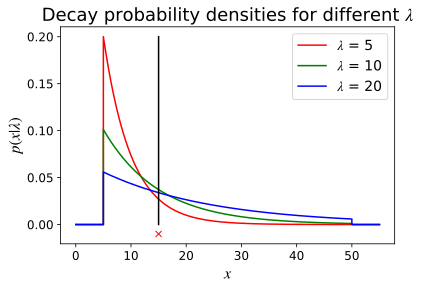

In [8]:
x = np.load('radioactive.npy') # load an array of data stored in the 'radioactive.npy' file

xs = np.linspace(5, 50, 500) # values of x at which to evaluate the likelihood
colors = ['red', 'green', 'blue'] # color of each line

# some arrays to handle the probability going to zero outside the detector i.e. x<5 or x>50
x_start = np.array([0, 5])
x_end = np.array([50, 55])
lik_0 = np.array([0, 0])
 
for i, lamb in enumerate([5, 10, 20]): # at each step enumerate does: i, lamb = number_of_iteration, list_entry
    Z = lamb*(np.exp(-5/lamb) - np.exp(-50/lamb)) # different Z for each lambda
    lik = np.exp(-xs/lamb)/Z # evaluate the likelihood for all xs at once (Numpy is very handy)
    
    xs_wide = np.concatenate([x_start, xs,x_end], axis=0)
    lik_wide = np.concatenate([lik_0, lik,lik_0], axis=0)
    
    plt.plot(xs_wide, lik_wide, color = colors[i], label = '$\lambda$ = {}'.format(lamb)) # plot
    beautify_plot({"title":"Decay probability densities for different $\lambda$", "x":"$x$", "y":'$p(x|\lambda)$'})


plt.plot(np.array([15, 15]),np.array([0, 0.2]),'black')    
plt.plot(np.array([15]),np.array([-0.01]),'red',marker = 'x')    


plt.gca().legend(fontsize = 14) # add legend for maximum style
plt.show()

toggle_code()

Now consider a decay event at x=15. This event has lowest density under $\lambda = 5$: the density decays away quickly before this point. It has higher density under $\lambda = 20$ as this function decays more slowly, but the larger normalising constant $Z(\lambda)$ in this case limits the improvement. The event has highest density under $\lambda=10$ which trades off these two effects.

We are now in a postion to plot $p( x=15 | \lambda )$ as a function of $\lambda$, that is the likelihood of $\lambda$ for this data-point.

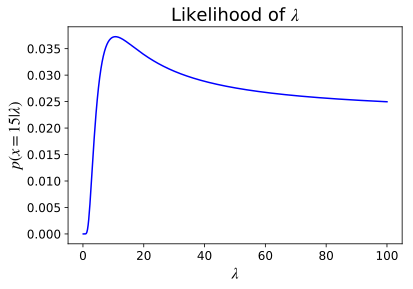

In [9]:
lamb = np.linspace(0.1, 100, 500) # values of x at which to evaluate the likelihood
xobs = 15 # observed value of x

Z = lamb*(np.exp(-5/lamb) - np.exp(-50/lamb)) # different Z for each lambda
lik = np.exp(-xobs/lamb)/Z # evaluate the likelihood for all xs at once (Numpy is very handy)
    
plt.plot(lamb, lik, color = 'blue') # plot
beautify_plot({"title":"Likelihood of $\lambda$", "x":"$\lambda$", "y":'$p(x=15|\lambda)$'})

plt.show()

toggle_code()

The likelihood has a peak around $\lambda=15$ which is a result of the trade-off identified above between the speed of the decay and the size of the normlizing constant. As a result, in the posterior, this data point contributes weak evidence that the underlying vaue of $\lambda$ is close to $15$. It rules out very small settings of $\lambda$ (the decay event was seen at too large a value of $x$ to be consistent with a short decay constant), but it is ambivalent toward higher values of $\lambda$ (afterall, in the limit of large $\lambda$  we are equally likely to see the decay event at any location within the device so _any_ single decay cannot rule out large decay constants). The posterior contains a likelihood contribution of this sort from each datapoint which multiply together. 

To visualise the posterior we must also make a choice for the prior. Here we make the very simple assumption that before seeing data $\lambda$ is uniformly likely to take a value from $0$ to $100$ and that it cannot take a value larger than this. That is, it obeys a uniform distribution,

$$\begin{align}
p(\lambda) = \mathcal{U}(\lambda; 0, 100)
\end{align}$$

We will take in more detail later about how to select priors, but it is not the focus here.

We can now plot the posterior distribution for our dataset:


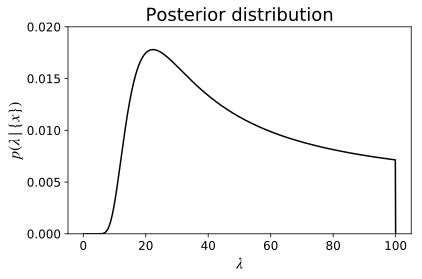

In [10]:
lambdas = np.linspace(0.1, 100, 1000) # Values of lambda where we want to evaluate the posterior.
Z = lambdas*(np.exp(-5/lambdas) - np.exp(-50/lambdas))

lik = np.exp(-np.sum(x)/lambdas)/Z**x.shape[0] # likelihood of the whole dataset

prior = np.heaviside(lambdas.max()-lambdas, 0)/(lambdas.max()-lambdas.min()) # uniform prior [0, 100]

post = lik*prior # calculate posterior (un-normalized)
dlamda = ((lambdas.max()-lambdas.min())/lambdas.shape[0]) # length of small line element dlamda
post /= post.sum()*dlamda # normalize posterior

plt.plot(lambdas, post, color = 'black', zorder = 1) # plot posterior
beautify_plot({"title":"Posterior distribution", "x":"$\lambda$", "y":'$p(\lambda \mid \{x\})$'})
plt.ylim([0, 0.02])
plt.yticks(np.linspace(0, 0.02, 5))
plt.tight_layout()
plt.savefig("radio_post.svg")
plt.show()

toggle_code()

This posterior has a peak around the value $\lambda =22.3$, but the peak is quite weak with e.g. $\lambda = 100$ having around half the probability density of the peak. This shows that there is weak evidence in the data that the value of $\lambda$ is around $22$, but that there is considerable uncertainty.

The posterior distribution is the ultimate answer to any inference problem encapsulating all the information we have about the parameters (both from the data and prior knowledge). However, the posterior distribution is a complex function and it is often useful to summarize it. 

One common approach is to compute the mean and variance of $\lambda$ under the posterior:

In [11]:
lamda_mean = (post*lambdas*dlamda).sum() # calculate the mean lamda by integration
lamda_std = (((lambdas - lamda_mean)**2)*post*dlamda).sum()**0.5 # calculate the lamda also by integration
print('lambda mean: {}, lambda standard deviation (uncertainty): {}'.format(lamda_mean.round(2), lamda_std.round(2)))

toggle_code()

lambda mean: 48.65, lambda standard deviation (uncertainty): 24.79


We could instead summarise our knowledge about $\lambda$  using the mode of the posterior, which is known as the maximum a posteriori (MAP) value of $\lambda$. The RMS variation around the MAP value can be used as error bars:

In [12]:
lamda_max = lambdas[np.argmax(post)] # use the maximum-posterior lamda as our estimate for lambda
lamda_std = (((lambdas - lamda_max)**2)*post*dlamda).sum()**0.5 # calculate the lamda also by integration
print('lambda mode: {}, lambda uncertainty: {}'.format(lamda_max.round(2), lamda_std.round(2)))

toggle_code()

lambda mode: 22.3, lambda uncertainty: 36.18


In this example, the MAP estimate gives a smaller $\lambda$ than using the mean of $\lambda$ since more weight falls to the right than to the left of the maximum of the posterior distribution (the distribution is skewed). 

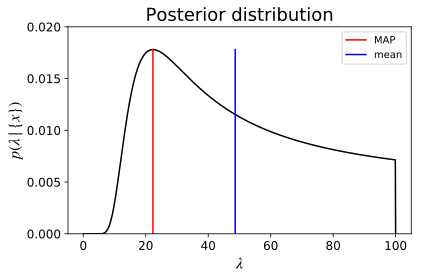

In [13]:
h1,=plt.plot(lambdas, post, color = 'black', zorder = 1) # plot posterior
h2,=plt.plot(lamda_max*np.array([1,1]), np.array([0,post.max()]), color='red', linewidth=1.5) # mark the posterior maximum with red point
h3,=plt.plot(lamda_mean*np.array([1,1]), np.array([0,post.max()]), color='blue', linewidth=1.5) # mark the posterior maximum with red point

beautify_plot({"title":"Posterior distribution", "x":"$\lambda$", "y":'$p(\lambda \mid \{x\})$'})
plt.ylim([0, 0.02])
plt.yticks(np.linspace(0, 0.02, 5))
plt.tight_layout()
plt.legend((h2, h3), ('MAP', 'mean'))
plt.savefig("radio_post_mean_MAP.svg")
plt.show()

toggle_code()

An alternative way of summarising the posterior is to draw samples for $\lambda$ from the posterior, $\lambda \sim p(\lambda | \{ x_n\}_{n=1}^N)$. These samples can be thought of as 'typical values of the decay constant that are consistent with the observed data'. 

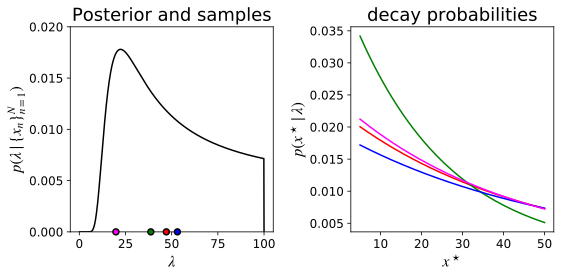

In [18]:
plt.figure(figsize = (8, 4))

colors = ['red', 'green', 'blue','magenta'] # color of each line

plt.subplot(1, 2, 1)

for n in range(4):
    
    lambda_sample = np.random.choice(lambdas, p = post/post.sum()) # random choice from lambdas with probabilities p
    lik_sample = np.exp(-xs/lambda_sample)/lambda_sample # single-sample likelihood for sampled lambda
    plt.scatter(lambda_sample, 0, marker = 'o', linewidth = 1.5,
                edgecolor = 'black', zorder = 3, color = colors[n], clip_on = False) # plot point
    
plt.ylim([0, 0.06])
plt.plot(lambdas, post, color = 'black', zorder = 1)
beautify_plot({"title":"Posterior and samples", "x":"$\lambda$", "y":"$p(\lambda \mid \{x_n\}_{n=1}^N)$"})
plt.ylim([0, 0.02])
plt.yticks(np.linspace(0, 0.02, 5))

plt.subplot(1, 2, 2)

for n in range(4):
    
    lambda_sample = np.random.choice(lambdas, p = post/post.sum()) # random choice from lambdas with probabilities p
    lik_sample = np.exp(-xs/lambda_sample)/lambda_sample # single-sample likelihood for sampled lambda
    plt.plot(xs, lik_sample, color = colors[n]) # plot likelihood
    

beautify_plot({"title":"decay probabilities", "x":"$x^\star$", "y":"$p(x^\star \mid \lambda)$"})
plt.tight_layout()
plt.show()

toggle_code()

We end this introductory example by considering one last question:

**How should we predict where the next decay event will occur?**

Prediction is a fundamental part of science and engineering. The probabilistic approach says:

1. that the answer to this question is the probability of the location next decay event $x^\star$ given the observed data \{x_n\}_{n=1}^N, that is $p(x^\star \lvert \{x_n\}_{n=1}^N)$. This is known as the predictive distribution.


2. that the predictive distribution can be computed using the rules of probability

\begin{align}
p(x^\star \lvert \{x_n\}_{n=1}^N) &= \int p(x^\star,\lambda \lvert \{x_n\}_{n=1}^N) \text{d} \lambda \;\;\; \text{(sum rule)}\\
%
& = \int p(x^\star \lvert  \lambda, \{x_n\}_{n=1}^N) p(\lambda | \{x_n\}_{n=1}^N) \text{d} \lambda \;\;\; \text{(product rule)}\\ 
%
& = \int p(x^\star \lvert  \lambda) p(\lambda | \{x_n\}_{n=1}^N) \text{d} \lambda \;\;\; \text{(modelling assumptions)}\\ 
\end{align}

The last line follows from that fact that if we know $\lambda$ then, under the model we are assuming, the data set $\{x_n\}_{n=1}^N$ provides no additional information about $x^\star $.

The predictive distribution has an intuitive form: it takes the prediction we would make if we knew $\lambda$, $p(x^\star \lvert  \lambda)$, weights it by the probability under the posterior $p(\lambda | \{x_n\}_{n=1}^N)$, and sums this quatity over all settings of $\lambda$.

Here's the predictive distribution in our case:

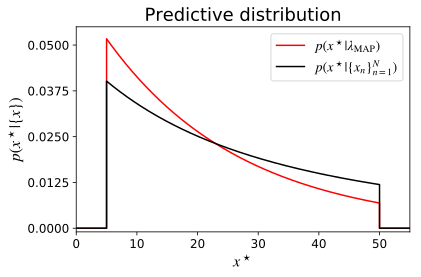

In [14]:
lambdas = np.linspace(0.1, 100, 1000)
xs = np.linspace(5, 50, 200)
l_grid, x_grid = np.meshgrid(lambdas, xs)

Z = l_grid*(np.exp(-5/l_grid) - np.exp(-50/l_grid)) # different Z for each lambda


lik = np.exp(-x_grid/l_grid)/Z

integrand = lik*post
dlambda = (lambdas.max() - lambdas.min())/lambdas.shape[0]
predictive = integrand.sum(axis = 1)*dlambda

# MAP prediction
ZMAP = lamda_max*(np.exp(-5/lamda_max) - np.exp(-50/lamda_max)) # different Z for each lambda
predictive_MAP = np.exp(-xs/lamda_max)/ZMAP;

# handle regions outside of detector 
x_start = np.array([0, 5])
x_end = np.array([50, 55])
predictive_0 = np.array([0, 0])
xs_wide = np.concatenate([x_start, xs,x_end], axis=0)
predictive_wide = np.concatenate([predictive_0, predictive,predictive_0], axis=0)
predictive_MAP_wide = np.concatenate([predictive_0, predictive_MAP,predictive_0], axis=0)


plt.plot(xs_wide, predictive_MAP_wide, color = 'red', label = '$p(x^\star | \lambda_{\mathrm{MAP}} )$')
plt.plot(xs_wide, predictive_wide, color = 'black', label = '$p(x^\star | \{x_n\}_{n=1}^N)$')

 

beautify_plot({"title":"Predictive distribution", "x":"$x^\star$", "y":"$p(x^\star|\{x\})$"})
plt.xlim([0, 55])
plt.ylim([-0.001, 0.055])
plt.yticks(np.linspace(0, 0.05, 5))
plt.tight_layout()
plt.gca().legend(fontsize = 14) # add legend for maximum style
plt.show()

toggle_code()

Here we have compared the predictive distribution to the prediction made by the MAP setting of the parameters. The predictive is less confident. Can you explain why?

Again, the predictive distribition can be summarised e.g. by a mean and a standard deviation.


In [15]:
dx = (xs.max() - xs.min())/xs.shape[0]
x_mean = (predictive*xs*dx).sum()
x_std = (predictive*(xs - x_mean)**2).sum()**0.5

print("Mean x: {}, standard deviation (uncertainty): {}".format(x_mean.round(2), x_std.round(2)))

toggle_code()

Mean x: 22.98, standard deviation (uncertainty): 26.78


## Summary

It is worth taking a moment to consider the steps taken above:

1. Assumed a form for the probabilistic relationship between the underlying parameter and each data point $p(x_n|\lambda)$.
2. Encoded prior information we have about $\lambda$ before seeing data into a **uniform prior distribution $p(\lambda)$**.
3. Applied Bayes' rule to find the posterior $p(\lambda|\{x_n\}_{n=1}^N)$ which told us how plausible each value of $\lambda$ is after observing the data set.
4. Calculated the predictive distribution of new decay events given the observed data $p(x^\star | \{x_{n}\}_{n=1}^N)$.

The approach is much more explicit and principled than the two heuristic methods proposed to begin with. Such approaches which retain probability distributions over parameters are called **Bayesian**. 

In the [next section](medical_example.ipynb) we consider how to **use inferences to make decisions**.

<div class="question_box">

## Questions

Here are some more questions about probabilistic inference:

1. **Inference in a Gaussian model**

    A noisy depth sensor measures the distance to an object an unknown distance $d$ metres away. The depth can be assumed, _a priori_, to be distributed according to a standard Gaussian distribution $p(d) = \mathcal{N}(d;0,1)$. The depth sensor returns $y$ a noisy measurement of the depth, that is also assumed to be Gaussian $p(y|d,\sigma_y^2) = \mathcal{N}(y;d,\sigma_y^2) $.

  * Compute the posterior distribution over the depth given the observation, $p(d|y,\sigma_y^2)$.   

  * What happens to the posterior distribution as the measurement noise becomes very large $\sigma_y^2 \rightarrow \infty$? Comment on this result. 

  The formula for the probability density of a Gaussian distribution of mean $\mu$ and variance $\sigma^2$ is given by 
    \begin{align}
\mathcal{N}(x;\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2 \right). \nonumber
\end{align}

<details>
<summary>Answer</summary>
<div>
<div class="row">
  <div class="column">
    <img src="solution-depth.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
  </div>
</div>
</div>
</details>

2. **Bayesian inference for a biased coin**

  A sequence of coin tosses are observed from a biased coin $x_{1:N}= \{ 0,1,1,0,1,1,1,1,0\}$

  \begin{align}
  x_{1:N}= \{ 0,1,1,0,1,1,1,1,0\}
  \end{align} 
  
  where $x_n=1$ indicates flip $n$ was a head and $x_n=0$ indicates that it was tails. An experimenter would like to estimate the coin's probability of landing heads, $\rho$, from these data. 

  The experimenter assumes that the coin flips are drawn independently from a Bernoulli distribution $p(x_n|\rho) = \rho^{x_n} (1-\rho)^{1-x_n}$ and uses a prior distribution of the form  

  \begin{align}
p(\rho|n_0,N_0) = \frac{1}{Z(n_0,N_0)}\rho^{n_0} (1-\rho)^{N_0-n_0}. \nonumber
\end{align}

  Here $n_0$ and $N_0$ are parameters set by the experimenter to encapsulate their prior beliefs.  $Z(n_0,N_0)$ returns the normalising constant of the distribution as a function of the parameters, $n_0$ and $N_0$.

  * Compute the posterior distribution over the bias $p(\rho | x_{1:N},n_0,N_0 )$. 
  * Compute the {\it maximum a posteriori} (MAP) estimate for the bias. 
  * Provide an intuitive interpretation for the parameters of the prior distribution, $n_0$ and $N_0$. For what setting of $n_0$ and $N_0$ does the MAP estimate become equal to the maximum-likelihood estimate? 

<details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
    <img src="solution-coin.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
  </div>
</div>
</details>


3. Inferential game show

  On a game show, a contestant is told the rules as follows:

  There are four doors, labelled 1, 2, 3 and 4. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other three doors, and {\it he will do so in such a way as not to reveal the prize}. For example, if you first choose door 1, he will then open one of doors 2, 3 and 4, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.

  At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to one of the other closed doors. All the doors will then be opened and you will receive whatever is behind your final choice of door.

  * Imagine that the contestant chooses door 1 first; then the gameshow host opens door 4, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 2 or 3, or (c) does it make no difference?

  * Use Bayes' rule to solve the problem.

<details>
<summary>Answer</summary>
<div>
<div class="row">
  <div class="column">
    <img src="solution-game-show-1.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
          <img src="solution-game-show-2.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
  </div>
</div>
</div>
</details>
</div>